des_facet
Black People                             3
Deaths (Fatalities)                      3
International Relations                  3
United States Politics and Government    3
Politics and Government                  3
                                        ..
Content Type: Personal Profile           1
Jazz                                     1
Nineteen Hundred Twenties                1
Income Inequality                        1
The Planets (Musical Work)               1
Name: count, Length: 89, dtype: int64


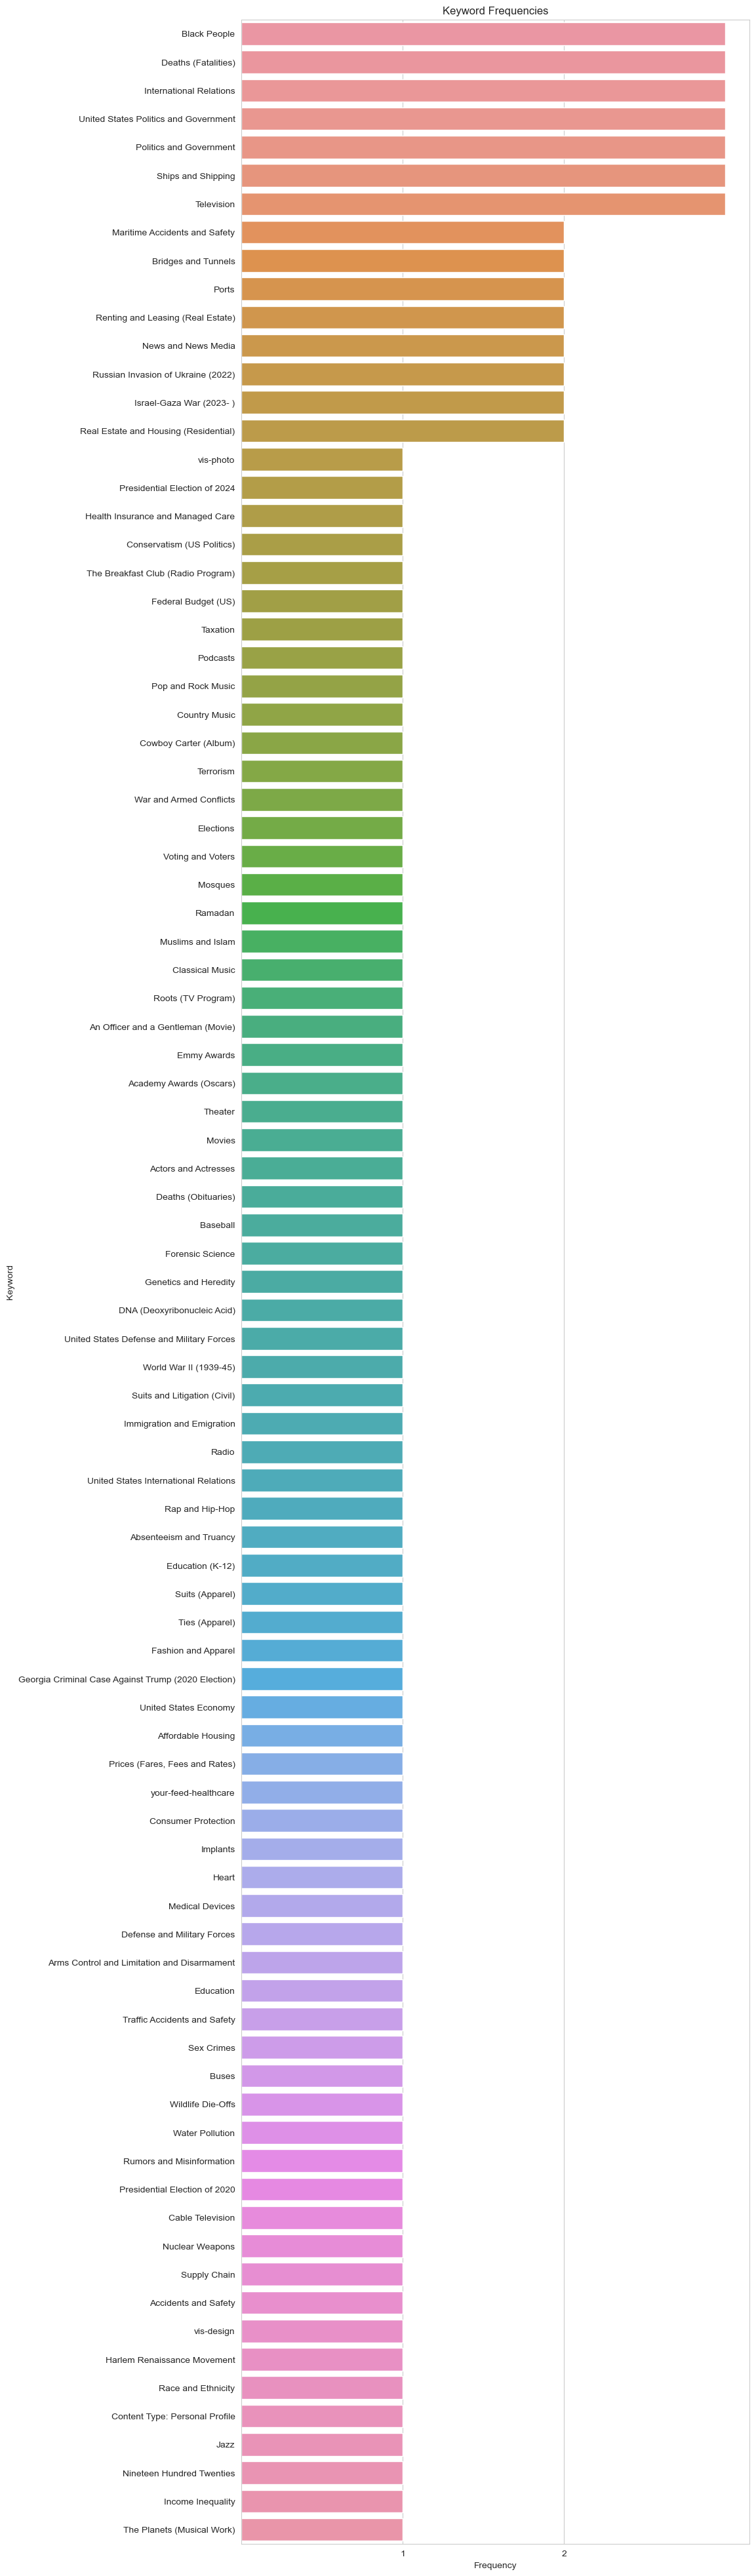

In [5]:
import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

#from config import API_KEY

top_stories = r.get(f"https://api.nytimes.com/svc/topstories/v2/home.json?api-key=MgvPTpwMtBFks1WBfPOCY4AfxIrf8xFE").content.decode()

nyt_home = pd.read_json(StringIO(top_stories))
nyt_home
results = pd.json_normalize(nyt_home['results'])
results

# # Parse keywords
keywords = results['des_facet'].explode()
keywords = keywords.value_counts()
print(keywords)

keywords = keywords.reset_index()


sns.set_style("whitegrid")

plt.figure(figsize=(10, 50))
plt.xticks(range(min(keywords['count']),max(keywords['count'])))
sns.barplot(x='count', y='des_facet', data=keywords, errorbar=None)
plt.title('Keyword Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

plt.show()